## Monte Carlo simulation: 

I'm gonna follow [this video](https://www.youtube.com/watch?v=_T0l015ecK4&ab_channel=codebliss) for monte carlo simulation.



#### Data Stucture for result: 

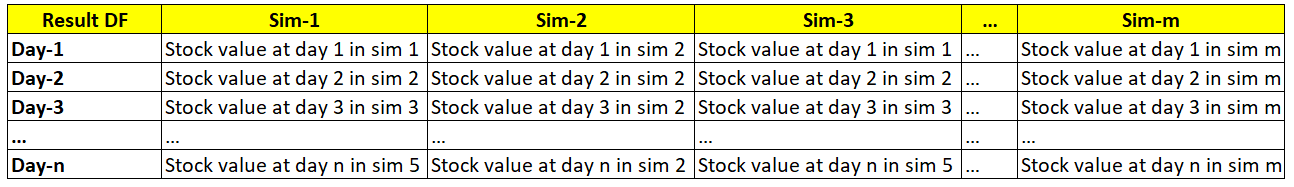

In [1]:
import numpy as np 
import pandas as pd 
import datetime

from matplotlib import pyplot as plt

In [2]:
# First determine the number of simulations to run which will be stored column wise:
num_simulations = 100

# Second determine the number of days 

In [3]:
# Next define result dataframes for both stocks:
## HDFC-HDFC Bank Merger: Completion of merger process expected by 2nd or 3rd quarter of FY24
## Fiscal Year 2024 FY24 means the 12-month period commencing on April 1, 2023, and ending on March 31, 2024.
## Q2 FY24 => July-Aug-Sept 2023
## Q3 FY24 => Oct-Nov-Dec 2023

### announced date
date_of_announcement = datetime.datetime.strptime("2022-04-04",'%Y-%m-%d').date()

### Assume the below date
date_of_completion = datetime.datetime.strptime("2023-11-15", '%Y-%m-%d').date()


today = datetime.date.today()

print("date_of_completion: "+str(date_of_completion))
print("date_of_announcement: "+str(date_of_announcement))
print("today: "+str(today))

# Count business days: 
approx_trading_days = np.busday_count( date_of_announcement, date_of_completion)
abs_days            = (date_of_completion-date_of_announcement).days

print("approx_trading_days: "+str(approx_trading_days))
print("Absolute day difference: "+str(abs_days)+" which has about "+str(abs_days-approx_trading_days)+" as weekends.")

n_days = approx_trading_days

date_of_completion: 2023-11-15
date_of_announcement: 2022-04-04
today: 2022-04-05
approx_trading_days: 422
Absolute day difference: 590 which has about 168 as weekends.


In [4]:
# Check if it is necessary to initialize the 
result_df_stock1 = pd.DataFrame()


### Research TO DO: 

TASK: Reasearch, Given a data series for a variable and its histogram distribution that suggests 
is a normal (gaussian) distribution. How can I generate list of random data which honours the distribution? 
How do I do this? 

Create a function for this. 

NOTE: Probability mass functions (pmf) are used to describe discrete probability distributions. While probability density functions (pdf) are used to describe continuous probability distributions.

Note: [List](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) of Continuous distribution types 

In [17]:
# Yet to be done

def model_fit_pmf(df, pmf_file): 
    ## given a stock price df 
    ## calculate the best fit over the gaussian and save the model into the file
    return 


def generate_n_samples_for_given_pmf(n_days, pmf_file):
    ## load pmf model from file and populate a list
    pmf_list = []
    return pmf_list

In [6]:
def generate_single_monte_carlo_output(df_input, n_days, pmf_list): 
    # Some operaions and generate 
    df_result = df.Dataframe()
    
    ## For i in range(0,n_days):
    ## populate stock series

    return df_result
    

In [7]:
# Calculate the Probability P(b>a) for each day:
# and store in resilt array


In [8]:
# when you have finished running simulation 
# calculate the probability of FIRST AND LAST DAY profit
# conclude and visualize the pobability 

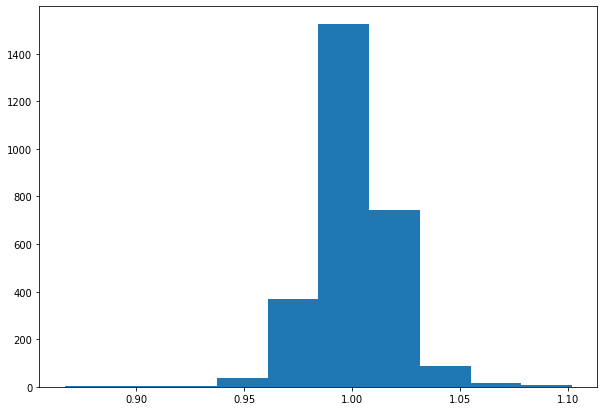

In [9]:

df = pd.read_csv("dataset/test.csv") 
data = df["Ratio a"].to_numpy()


# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data)
 
# Show plot
plt.show()

In [10]:
data_min = np.min(data)
data_max = np.max(data)
print(data_min,data_max)

0.867014453 1.101881964


In [11]:
## Copied from: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [12]:
p, q, r = get_best_distribution(data)

p value for norm = 5.818000057152288e-07
p value for exponweib = 3.4950461638208276e-07
p value for weibull_max = 4.586249219640277e-22
p value for weibull_min = 3.8939299179064776e-23


C:\Users\rswarnka\AppData\Local\mypythonenvs\python3-dev\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.0
Best fitting distribution: norm
Best p value: 5.818000057152288e-07
Parameters for the best fit: (1.000650438096705, 0.01830774187201713)


C:\Users\rswarnka\AppData\Local\mypythonenvs\python3-dev\lib\site-packages\scipy\stats\_continuous_distns.py:2500: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


In [13]:
print(p,q)
print("mean is "+str(r[0]))
print("sigma is "+str(r[1]))

norm 5.818000057152288e-07
mean is 1.000650438096705
sigma is 0.01830774187201713


In [57]:
# https://stackoverflow.com/questions/36256994/how-to-generate-data-from-normal-distribution

mu, sigma = r[0], r[1]
artificial_samples = np.random.normal(mu, sigma, n_days)


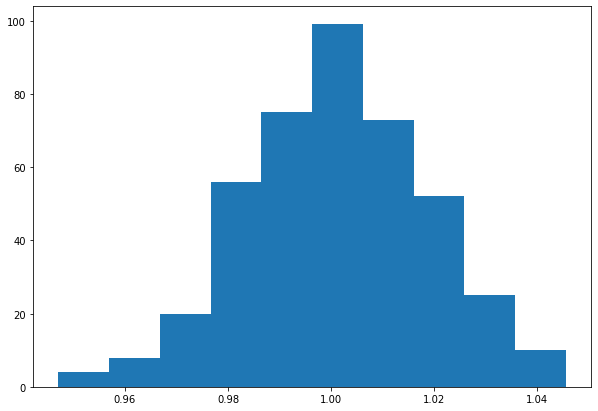

In [58]:
# Plot artificial samples: 

# Creating histogram
fig, az = plt.subplots(figsize =(10, 7))
az.hist(artificial_samples)
 
# Show plot
plt.show()

In [59]:
initial_price_a = 2676

simulation_a = [0] * len(artificial_samples)

for i in range(len(artificial_samples)):
    if(i==0):
        simulation_a[0] = artificial_samples[0] * initial_price_a
    else:
        simulation_a[i] = artificial_samples[i] * simulation_a[i-1]

 

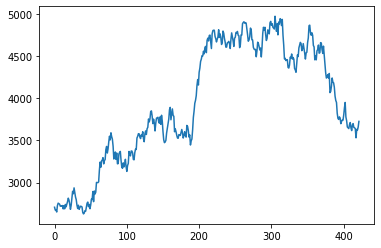

In [60]:
simulation_a = np.array(simulation_a)

plt.plot(simulation_a)
plt.show()
